<a href="https://colab.research.google.com/github/sarathchandray/ML_Algorithms/blob/main/LogisticRegression_tuning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Features (X) – the input data (e.g. measurements of a flower)
# Target (y) – the label or output (e.g. flower species)
# iris.data → your input features
# iris.target → your expected output (target labels)
# iris.data → is a 2D array of feature vectors (shape: 150 samples × 4 features)
# iris.target → is a 1D array of class labels (shape: 150, one label per sample)

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
target_names = iris.target_names

# Display sample data
print("📊 Sample Iris Dataset:\n", df.head())
print("\n🎯 Target Class Names:", target_names)

📊 Sample Iris Dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

🎯 Target Class Names: ['setosa' 'versicolor' 'virginica']


In [15]:
# Split features and target using DataFrame
X = df.drop('target', axis=1)
y = df['target']


,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [16]:
# Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Define parameter grid with only C and penalty
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Only 'liblinear' supports both l1 and l2
}

In [18]:
# Create and fit GridSearchCV
model = LogisticRegression(max_iter=200)
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [19]:
# Predictions
y_pred = grid.predict(X_test)

In [22]:
# Evaluation metrics
print("\n Best Parameters:", grid.best_params_)
print("\n Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

 Accuracy Score: 1.0

 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


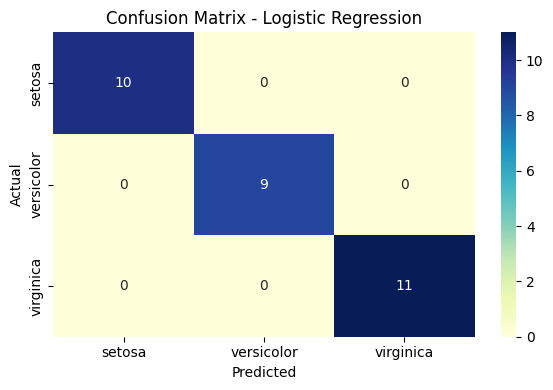

In [23]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names, cmap='YlGnBu')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()